In [154]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [65]:
from importlib import reload

In [2]:
from twoppp import plot as myplt

In [3]:
import loaddata

In [63]:
import params, plotpanels, stimulation

In [5]:
import seaborn as sns

In [6]:
from scipy.stats import mannwhitneyu

In [7]:
from scipy.ndimage import gaussian_filter1d, gaussian_filter, median_filter

In [8]:
import pickle

In [137]:
data_dir = "/mnt/nas2/JB/_data_summary/plotdata/natbeh_None_resp_MDN3.pkl"
with open(data_dir, "rb") as f:
    all_fly_data = pickle.load(f)

In [139]:
print(len(all_fly_data))
all_fly_data = [fly_data for fly_data in all_fly_data if fly_data["nat_n_sel_responses"] > 15 and fly_data["n_sel_responses"] > 15]
print(len(all_fly_data))

1
1


In [140]:
fly_data = all_fly_data[0]
fly_data

{'fly_df':                                                fly_dir  \
 216  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 217  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 218  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 219  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 220  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 221  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 222  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...   
 
                                              trial_dir    date  \
 216  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...  230513   
 217  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...  230513   
 218  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...  230513   
 219  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...  230513   
 220  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...  230513   
 221  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsChrimso...  230513   
 222  /mnt/nas2/JB/230513_DfdxGCaMP6s_MDN3xCsCh

In [143]:
stim_response_values, stim_response_conf_int = stimulation.summarise_responses(fly_data["stim_responses"],
                                                                     only_confident=0, return_conf_int=True)
nat_response_values, nat_response_conf_int = stimulation.summarise_responses(fly_data["nat_responses"],
                                                                     only_confident=0, return_conf_int=True)

<IPython.core.display.Javascript object>


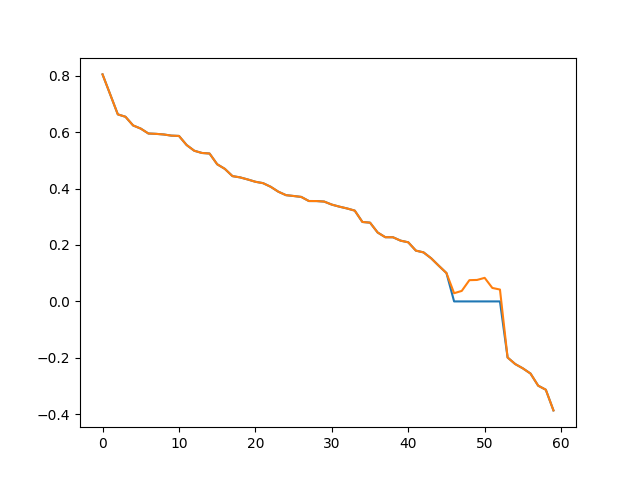

In [144]:
%matplotlib notebook
plt.plot(sorted_stim_resp)
plt.plot(stim_response_values[np.flip(fly_data["sort_ind"])])

<IPython.core.display.Javascript object>


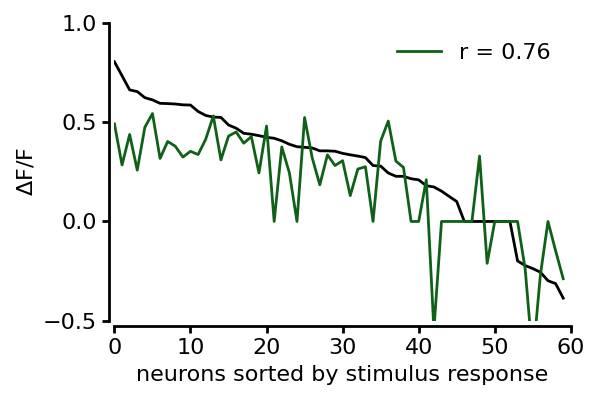

In [145]:
%matplotlib notebook

fig, ax = plt.subplots(1,1,figsize=(6,4))


n_neurons = len(fly_data["response_values"])
sorted_stim_resp = np.array(fly_data["response_values"][np.flip(fly_data["sort_ind"])])
sorted_nat_resp = np.array(fly_data["nat_response_values"][np.flip(fly_data["sort_ind"])])

corr_coef = np.corrcoef(sorted_stim_resp, sorted_nat_resp)[0,1]

ax.plot(np.arange(n_neurons), sorted_stim_resp, color=myplt.BLACK, linewidth=2)
ax.plot(np.arange(n_neurons), sorted_nat_resp, color=myplt.DARKGREEN, linewidth=2, label=f"r = {corr_coef:.3}")
ax.legend(frameon=False, fontsize=16)
ax.set_xlim([0,n_neurons])
ax.set_ylim([-0.5,1])
ax.set_yticks([-0.5,0,0.5,1])
ax.set_xlabel("neurons sorted by stimulus response")
ax.set_ylabel(r"$\Delta$F/F")
plotpanels.make_nice_spines(ax)
fig.tight_layout()

In [155]:
stim_labels = (stim_response_values>stim_response_conf_int).astype(int) - \
              (stim_response_values<-1*stim_response_conf_int).astype(int)
nat_labels = (nat_response_values>nat_response_conf_int).astype(int) - \
              (nat_response_values<-1*nat_response_conf_int).astype(int)
conf_matrix = np.flip(confusion_matrix(y_true=stim_labels, y_pred=nat_labels))
conf_matrix

array([[39,  8,  1],
       [ 0,  4,  1],
       [ 0,  2,  5]])

<IPython.core.display.Javascript object>


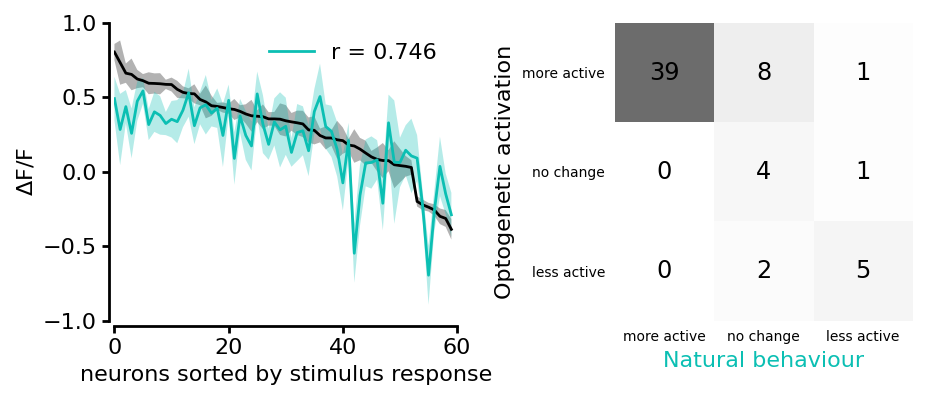

In [158]:
%matplotlib notebook

fig, axs = plt.subplots(1,2,figsize=(9.5,4))

n_neurons = len(stim_response_values)
sort_ind = np.flip(np.argsort(stim_response_values))


n_neurons = len(fly_data["response_values"])

corr_coef = np.corrcoef(stim_response_values, nat_response_values)[0,1]

# ax.plot(stim_response_values[sort_ind], color=myplt.BLACK, linewidth=2)
myplt.plot_mu_sem(mu=stim_response_values[sort_ind], err=stim_response_conf_int[sort_ind], ax=axs[0], color=myplt.BLACK, linewidth=2)
myplt.plot_mu_sem(mu=nat_response_values[sort_ind], err=nat_response_conf_int[sort_ind], ax=axs[0], color=myplt.DARKCYAN, linewidth=2,
                 label=f"r = {corr_coef:.3}")
# ax.plot(nat_response_values[sort_ind], color=myplt.DARKGREEN, linewidth=2, label=f"r = {corr_coef:.3}")
axs[0].legend(frameon=False, fontsize=16)
axs[0].set_xlim([0,n_neurons])
axs[0].set_ylim([-1,1])
axs[0].set_yticks([-1,-0.5,0,0.5,1])
axs[0].set_xlabel("neurons sorted by stimulus response")
axs[0].set_ylabel(r"$\Delta$F/F")
plotpanels.make_nice_spines(axs[0])
# ax.spines['bottom'].set_position('zero')


axs[1].imshow(conf_matrix, cmap=plt.cm.Greys, clim=[0,len(stim_labels)])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

axs[1].set_ylabel('Optogenetic activation', fontsize=16)
axs[1].set_yticks([0,1,2])
axs[1].set_yticklabels(["more active", "no change", "less active"])
axs[1].set_xlabel('Natural behaviour', fontsize=16, color=myplt.DARKCYAN)
axs[1].set_xticks([0,1,2])
axs[1].set_xticklabels(["more active", "no change", "less active"])
axs[1].spines["top"].set_linewidth(0)
axs[1].spines["right"].set_linewidth(0)
axs[1].spines["bottom"].set_linewidth(0)
axs[1].spines["left"].set_linewidth(0)
axs[1].tick_params(width=0)
fig.tight_layout()


array([[39,  8,  1],
       [ 0,  4,  1],
       [ 0,  2,  5]])

<IPython.core.display.Javascript object>


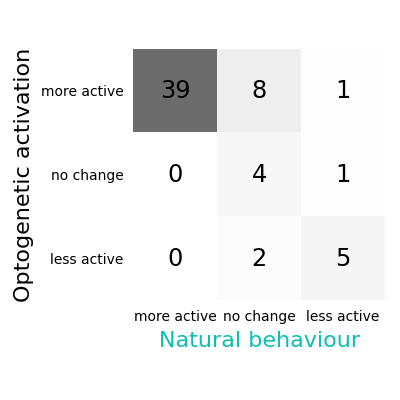

In [153]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(conf_matrix, cmap=plt.cm.Greys, clim=[0,len(stim_labels)])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

ax.set_ylabel('Optogenetic activation', fontsize=16)
ax.set_yticks([0,1,2])
ax.set_yticklabels(["more active", "no change", "less active"])
ax.set_xlabel('Natural behaviour', fontsize=16, color=myplt.DARKCYAN)
ax.set_xticks([0,1,2])
ax.set_xticklabels(["more active", "no change", "less active"])
ax.spines["top"].set_linewidth(0)
ax.spines["right"].set_linewidth(0)
ax.spines["bottom"].set_linewidth(0)
ax.spines["left"].set_linewidth(0)
ax.tick_params(width=0)
fig.tight_layout()


In [108]:
n_positive_overlap = np.sum(np.logical_and(stim_response_values>stim_response_conf_int, nat_response_values>nat_response_conf_int))
n_positive = np.sum(stim_response_values>stim_response_conf_int)
n_negative_overlap = np.sum(np.logical_and(stim_response_values<-1*stim_response_conf_int, nat_response_values<-1*nat_response_conf_int))
n_negative = np.sum(stim_response_values<-1*stim_response_conf_int)
n_pos_neg = np.sum(np.logical_and(stim_response_values>stim_response_conf_int, nat_response_values<-1*nat_response_conf_int))
n_neg_pos = np.sum(np.logical_and(stim_response_values<-1*stim_response_conf_int, nat_response_values>nat_response_conf_int))

n_neg_not_overlap = np.sum(np.logical_and(stim_response_values<stim_response_conf_int, nat_response_values<nat_response_conf_int))
n_neg_not = np.sum(stim_response_values<stim_response_conf_int)



print(f"total: {len(stim_response_values)}, pos. overlap: {n_positive_overlap}/{n_positive}, neg./not overlap: {n_neg_not_overlap}/{n_neg_not}, neg. overlap: {n_negative_overlap}/{n_negative}, contra: {n_pos_neg+n_neg_pos}")

total: 68, pos. overlap: 7/28, neg./not overlap: 34/40, neg. overlap: 21/33, contra: 8


In [9]:
data_dir = "/mnt/nas2/JB/_data_summary/plotdata/natbeh_not_walk_resp_DNp09.pkl"
with open(data_dir, "rb") as f:
    all_fly_data = pickle.load(f)

In [10]:
print(len(all_fly_data))
all_fly_data = [fly_data for fly_data in all_fly_data if fly_data["nat_n_sel_responses"] > 15 and fly_data["n_sel_responses"] > 15]
print(len(all_fly_data))

6
3


In [11]:
all_fly_data[0].keys()

dict_keys(['fly_df', 'fly_id', 'fly_dir', 'trial_names', 'backgound_image', 'roi_centers', 'stim_responses', 'nat_responses', 'response_values', 'nat_response_values', 'sort_ind', 'clim', 'beh_responses', 'nat_beh_responses', 'beh_class_responses', 'nat_beh_class_responses', 'n_responses', 'nat_n_responses', 'n_sel_responses', 'nat_n_sel_responses', 'n_other_responses', 'nat_n_other_responses', 'background_image'])

<IPython.core.display.Javascript object>


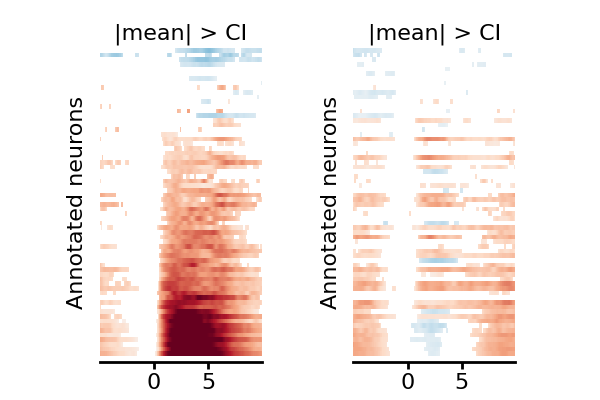

In [12]:
%matplotlib notebook
fig, axs = plt.subplots(1,2, figsize=(6,4))
plotpanels.plot_ax_allneurons_confidence(stim_responses=all_fly_data[0]["stim_responses"],
                                         sort_ind=all_fly_data[0]["sort_ind"], clim=0.8, ax=axs[0])
plotpanels.plot_ax_allneurons_confidence(stim_responses=all_fly_data[0]["nat_responses"],
                                         sort_ind=all_fly_data[0]["sort_ind"], clim=0.8, ax=axs[1])

<IPython.core.display.Javascript object>


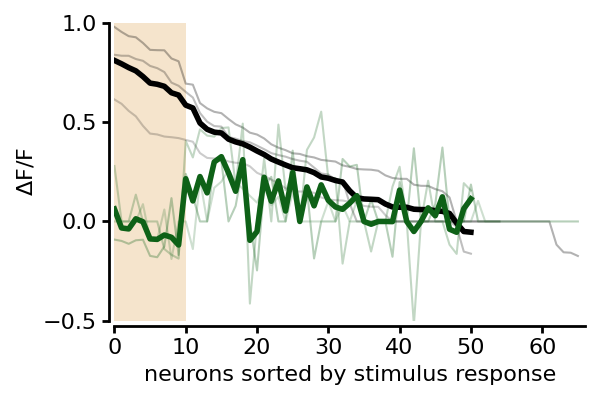

In [44]:
%matplotlib notebook

fig, ax = plt.subplots(1,1,figsize=(6,4))

n_bins = 100

bins_stim_sum = np.zeros((n_bins))
bins_nat_sum = np.zeros((n_bins))
n_per_bin = np.zeros((n_bins))

min_n_neurons = n_bins
max_n_neurons = 0

for i_fly, alpha in enumerate(np.linspace(0.3,0.2, len(all_fly_data))):
    n_neurons = len(all_fly_data[i_fly]["response_values"])
    if n_neurons < min_n_neurons:
        min_n_neurons = n_neurons
    if n_neurons > max_n_neurons:
        max_n_neurons = n_neurons
    sorted_stim_resp = np.array(all_fly_data[i_fly]["response_values"][np.flip(all_fly_data[i_fly]["sort_ind"])])
    sorted_nat_resp = np.array(all_fly_data[i_fly]["nat_response_values"][np.flip(all_fly_data[i_fly]["sort_ind"])])
    ax.plot(np.arange(n_neurons), sorted_stim_resp, color=myplt.BLACK, alpha=alpha)
    ax.plot(np.arange(n_neurons), sorted_nat_resp, color=myplt.DARKGREEN, alpha=alpha)
    bins_stim_sum[:n_neurons] += sorted_stim_resp
    bins_nat_sum[:n_neurons] += sorted_nat_resp
    n_per_bin[:n_neurons] += 1
    """
    for i_n, x_n in enumerate(np.linspace(0,1, len(all_fly_data[i_fly]["response_values"]))):
        i_bin = np.minimum(np.floor(x_n*n_bins),n_bins-1).astype(int)
        bins_stim_sum[i_bin] += sorted_stim_resp[i_n]
        bins_stim[i_bin].append(sorted_stim_resp[i_n])
        bins_nat_sum[i_bin] += sorted_nat_resp[i_n]
        bins_nat[i_bin].append(sorted_nat_resp[i_n])
        n_per_bin[i_bin] += 1
    """
    
ax.plot(np.arange(min_n_neurons), bins_stim_sum[:min_n_neurons] / len(all_fly_data), color=myplt.BLACK, linewidth=4)
ax.plot(np.arange(min_n_neurons), bins_nat_sum[:min_n_neurons] / len(all_fly_data), color=myplt.DARKGREEN, linewidth=4)
# ax.plot(np.linspace(0,1,n_bins,endpoint=False)+0.5/n_bins, bins_stim_sum/n_per_bin, color=myplt.BLACK, linewidth=4)
# ax.plot(np.linspace(0,1,n_bins,endpoint=False)+0.5/n_bins, bins_nat_sum/n_per_bin, color=myplt.DARKGREEN, linewidth=4)
ax.axvspan(0, 10, alpha=0.2, color=myplt.DARKORANGE, ec=None)
ax.set_xlim([0,max_n_neurons])
ax.set_ylim([-0.5,1])
ax.set_yticks([-0.5,0,0.5,1])
ax.set_xlabel("neurons sorted by stimulus response")
ax.set_ylabel(r"$\Delta$F/F")
plotpanels.make_nice_spines(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


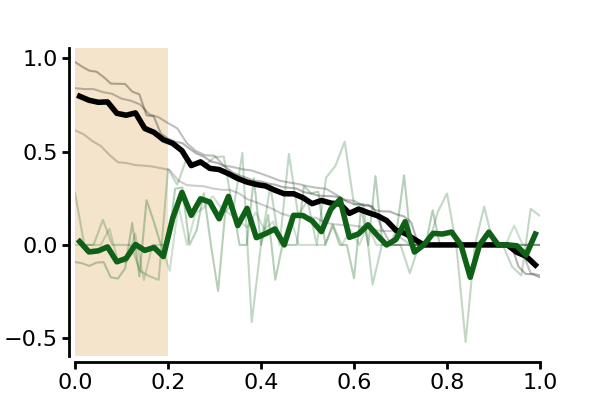

In [23]:
%matplotlib notebook

fig, ax = plt.subplots(1,1,figsize=(6,4))

n_bins = 50

bins_stim_sum = np.zeros((n_bins))
bins_stim = [[] for _ in range(n_bins)]
bins_nat_sum = np.zeros((n_bins))
bins_nat = [[] for _ in range(n_bins)]
n_per_bin = np.zeros((n_bins))

for i_fly, alpha in enumerate(np.linspace(0.3,0.2, len(all_fly_data))):
    sorted_stim_resp = np.array(all_fly_data[i_fly]["response_values"][np.flip(all_fly_data[i_fly]["sort_ind"])])
    sorted_nat_resp = np.array(all_fly_data[i_fly]["nat_response_values"][np.flip(all_fly_data[i_fly]["sort_ind"])])
    ax.plot(np.linspace(0,1, len(all_fly_data[i_fly]["response_values"])), sorted_stim_resp, color=myplt.BLACK, alpha=alpha)
    ax.plot(np.linspace(0,1, len(all_fly_data[i_fly]["response_values"])), sorted_nat_resp, color=myplt.DARKGREEN, alpha=alpha)
    
    for i_n, x_n in enumerate(np.linspace(0,1, len(all_fly_data[i_fly]["response_values"]))):
        i_bin = np.minimum(np.floor(x_n*n_bins),n_bins-1).astype(int)
        bins_stim_sum[i_bin] += sorted_stim_resp[i_n]
        bins_stim[i_bin].append(sorted_stim_resp[i_n])
        bins_nat_sum[i_bin] += sorted_nat_resp[i_n]
        bins_nat[i_bin].append(sorted_nat_resp[i_n])
        n_per_bin[i_bin] += 1
ax.plot(np.linspace(0,1,n_bins,endpoint=False)+0.5/n_bins, bins_stim_sum/n_per_bin, color=myplt.BLACK, linewidth=4)
ax.plot(np.linspace(0,1,n_bins,endpoint=False)+0.5/n_bins, bins_nat_sum/n_per_bin, color=myplt.DARKGREEN, linewidth=4)
ax.axvspan(0, 0.2, alpha=0.2, color=myplt.DARKORANGE, ec=None)
ax.set_xlim([0,1])
plotpanels.make_nice_spines(ax)

<IPython.core.display.Javascript object>


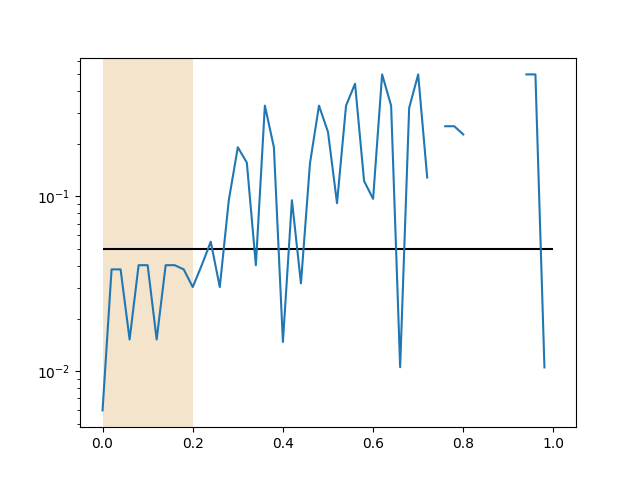

In [14]:
%matplotlib notebook
pvalues = np.zeros((n_bins))
for i, (bin_stim, bin_nat) in enumerate(zip(bins_stim, bins_nat)):
    try:
        pvalues[i] = mannwhitneyu(bin_stim, bin_nat).pvalue
    except:
        pvalues[i] = None
plt.plot(np.linspace(0,1,n_bins,endpoint=False), pvalues)
plt.yscale("log")
plt.hlines(y=0.05, xmin=0,xmax=1, color="k")
plt.axvspan(0, 0.2, alpha=0.2, color=myplt.DARKORANGE, ec=None)

<IPython.core.display.Javascript object>


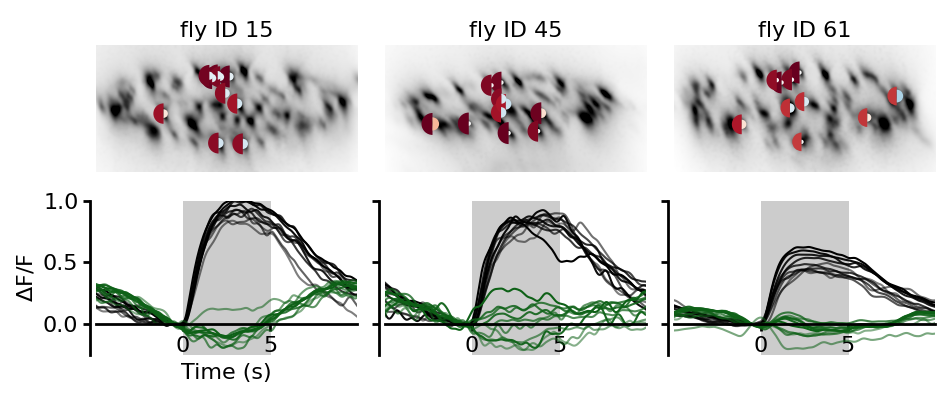

10 66
[ 76  77  79  80  83 121 147 172 246 248]
[ 9 50 51 49 52 16 17 57  4 58]
10 51
[ 94 101 135 148 169 171 197 198 216 221]
[31 16  6 21  8  7 43 41 17 42]
10 55
[ 69  87  88  94 128 142 158 182 199 243]
[14 45 13 15  9 17 16 33 38 24]


In [43]:
fig, axs = plt.subplots(2,len(all_fly_data), figsize=(9.5,4), sharex="row", sharey="row")
x = np.arange(np.sum(params.response_t_params_2p))/params.fs_int-params.response_t_params_2p_label[0]


USE_ABS_THRES = True
rel_thres_resp = 0.2
abs_thres_resp = 10
for i_fly, alpha in enumerate(np.linspace(1,0.5, len(all_fly_data))):
    n_neurons = len(all_fly_data[i_fly]["response_values"])
    if USE_ABS_THRES:
        thres_resp_fly = abs_thres_resp
    else:
        thres_resp_fly = np.floor(rel_thres_resp*n_neurons).astype(int)
    print(thres_resp_fly, n_neurons)
    sel_neurons = np.flip(all_fly_data[i_fly]["sort_ind"])[:thres_resp_fly]
    # sel_neurons = np.array([sel_neuron for sel_neuron in sel_neurons
    #                         if all_fly_data[i_fly]["nat_response_values"][sel_neuron] <= 0])
    
    neurons_y = np.array(all_fly_data[i_fly]["roi_centers"])[sel_neurons][:,0]
    neurons_y = neurons_y[neurons_y.argsort()]
    print(neurons_y)
    sel_neurons = sel_neurons[neurons_y.argsort()]
    
    print(sel_neurons)
    plotpanels.plot_ax_response_summary(background_image=all_fly_data[i_fly]["background_image"],
                                        roi_centers=np.array(all_fly_data[i_fly]["roi_centers"])[sel_neurons],
                                        ax=axs[0, i_fly],
                                        response_values_left=all_fly_data[i_fly]["response_values"][sel_neurons],
                                        response_values_right=all_fly_data[i_fly]["nat_response_values"][sel_neurons],
                                        title=f"fly ID {all_fly_data[i_fly]['fly_df'].fly_id.values[0]}")
    
    stim_response = np.mean(all_fly_data[i_fly]["stim_responses"][:,sel_neurons,:], axis=-1)
    i_0 = int(params.response_t_params_2p[0])
    i_b = int(i_0 - params.response_n_baseline)
    rel_stim_response = stim_response-np.mean(stim_response[i_b:i_0], axis=0)
    _ = [axs[1,i_fly].plot(x, rel_stim_response[:,i], color=myplt.BLACK, alpha=a)
         for i, a in enumerate(np.linspace(1,0.5, len(sel_neurons)))]
    nat_response = np.mean(all_fly_data[i_fly]["nat_responses"][:,sel_neurons,:], axis=-1)
    i_0 = int(params.response_t_params_2p[0])
    i_b = int(i_0 - params.response_n_baseline)
    rel_nat_response = nat_response-np.mean(nat_response[i_b:i_0], axis=0)
    _ = [axs[1,i_fly].plot(x, rel_nat_response[:,i], color=myplt.DARKGREEN, alpha=a)
         for i, a in enumerate(np.linspace(1,0.5, len(sel_neurons)))]
    myplt.shade_categorical(catvar=np.concatenate((np.zeros((params.response_t_params_2p[0])),
                                                           np.ones((params.response_t_params_2p[1])),
                                                           np.zeros((params.response_t_params_2p[2])))),
                                    x=x,colors=[myplt.WHITE, myplt.BLACK], ax=axs[1,i_fly])
    if i_fly == 0:
        axs[1,i_fly].set_xlabel("Time (s)")
        axs[1,i_fly].set_ylabel(r"$\Delta$F/F")
        axs[1,i_fly].set_xlim([-5,10])
        axs[1,i_fly].set_ylim(-0.25,1)
        axs[1,i_fly].set_yticks([0,0.5,1])
    plotpanels.make_nice_spines(axs[1, i_fly])
    axs[1,i_fly].set_xticks([0,params.response_t_params_2p_label[1]])
    axs[1,i_fly].spines['bottom'].set_position('zero')
    fig.tight_layout()

<IPython.core.display.Javascript object>


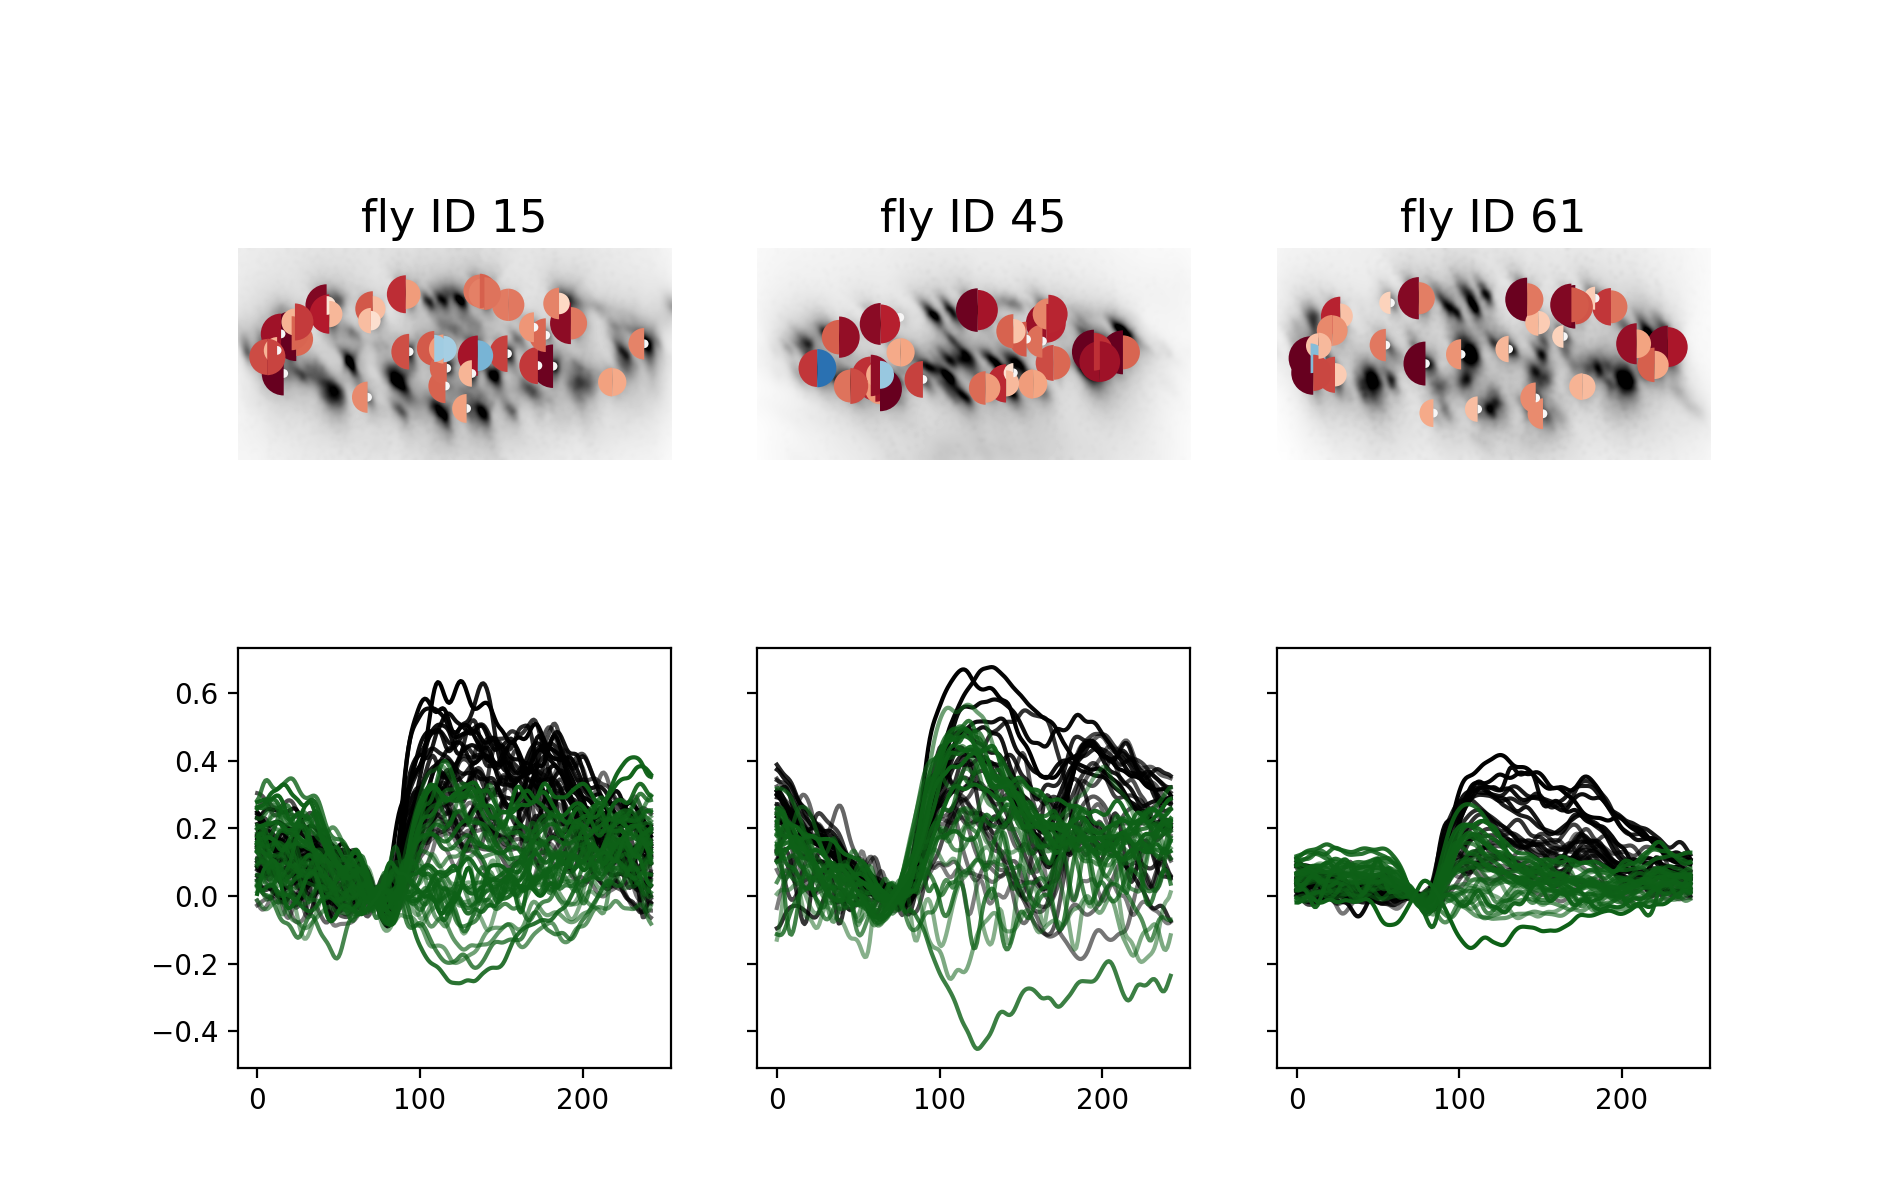

11 66
[ 64  68  69  83  85  86  91  99 109 111 113 119 128 129 131 137 144 151
 152 154 156 159 162 164 177 178 181 189 189 202 208 225 242]
[48 36 35 24 43 27 37 59 42  8 23 20 38 11 44 56 14 12 26 53 10 54 31 64
  5 25 55 29 62 33 40 13 45]
11 51
[ 93  99 104 113 114 125 134 137 140 156 157 157 171 173 181 188 191 192
 198 201 204 205 208 211 213]
[48 28  9  3 38 49 36 50 35  2 13 23 46 30 47 19 22 32 12 34 44  5 37 45
  4]
11 55
[ 75  75  77  82  85  88  88 102 112 124 133 144 146 147 149 152 160 166
 174 176 188 191 209 226 243 249 250]
[ 4 43  8 25 48 39 49 12 40  1 51  5 42  6  2 36 35 46 22 32 18 26 23  3
 50 28 11]


In [90]:
fig, axs = plt.subplots(2,len(all_fly_data), figsize=(9.5,6), sharex="row", sharey="row")

thres_resp_low = 0.2
thres_resp_up = 0.7
for i_fly, alpha in enumerate(np.linspace(1,0.5, len(all_fly_data))):
    n_neurons = len(all_fly_data[i_fly]["response_values"])
    thres_resp_fly_low = np.floor(thres_resp_low*n_neurons).astype(int)
    thres_resp_fly_up = np.floor(thres_resp_up*n_neurons).astype(int)
    print(thres_resp_fly, n_neurons)
    sel_neurons = np.flip(all_fly_data[i_fly]["sort_ind"])[thres_resp_fly_low:thres_resp_fly_up]
    # sel_neurons = np.array([sel_neuron for sel_neuron in sel_neurons
    #                         if all_fly_data[i_fly]["nat_response_values"][sel_neuron] <= 0])
    
    neurons_y = np.array(all_fly_data[i_fly]["roi_centers"])[sel_neurons][:,0]
    neurons_y = neurons_y[neurons_y.argsort()]
    print(neurons_y)
    sel_neurons = sel_neurons[neurons_y.argsort()]
    
    print(sel_neurons)
    plotpanels.plot_ax_response_summary(background_image=all_fly_data[i_fly]["background_image"],
                                        roi_centers=np.array(all_fly_data[i_fly]["roi_centers"])[sel_neurons],
                                        ax=axs[0, i_fly],
                                        response_values_left=all_fly_data[i_fly]["response_values"][sel_neurons],
                                        response_values_right=all_fly_data[i_fly]["nat_response_values"][sel_neurons],
                                        title=f"fly ID {all_fly_data[i_fly]['fly_df'].fly_id.values[0]}")
    
    stim_response = np.mean(all_fly_data[i_fly]["stim_responses"][:,sel_neurons,:], axis=-1)
    i_0 = int(params.response_t_params_2p[0])
    i_b = int(i_0 - params.response_n_baseline)
    rel_stim_response = stim_response-np.mean(stim_response[i_b:i_0], axis=0)
    _ = [axs[1,i_fly].plot(rel_stim_response[:,i], color=myplt.BLACK, alpha=a)
         for i, a in enumerate(np.linspace(1,0.5, len(sel_neurons)))]
    nat_response = np.mean(all_fly_data[i_fly]["nat_responses"][:,sel_neurons,:], axis=-1)
    i_0 = int(params.response_t_params_2p[0])
    i_b = int(i_0 - params.response_n_baseline)
    rel_nat_response = nat_response-np.mean(nat_response[i_b:i_0], axis=0)
    _ = [axs[1,i_fly].plot(rel_nat_response[:,i], color=myplt.DARKGREEN, alpha=a)
         for i, a in enumerate(np.linspace(1,0.5, len(sel_neurons)))]

In [107]:
beh_df = pd.read_pickle('/mnt/nas2/JB/230125_AN6xCsChrimson/Fly1/004_head_plevels/processed/beh_df.pkl')
beh_df

t  \
Date   Genotype       Fly TrialName        Trial Frame               
230125 AN6xCsChrimson 1   004_head_plevels 3     0        7.173400   
                                                 1        7.183367   
                                                 2        7.193367   
                                                 3        7.203367   
                                                 4        7.213367   
...                                                            ...   
                                                 15495  162.033933   
                                                 15496  162.043900   
                                                 15497  162.053900   
                                                 15498  162.063900   
                                                 15499  162.073900   

                                                             abs_t  \
Date   Genotype       Fly TrialName        Trial Frame               
230125 AN6xCsChrimson 1   004_head_plevels 3     0        7.173400   
                                                 1        7.183367   
                                                 2        7.193367   
                                                 3        7.203367   
                                                 4        7.213367   
...                                                            ...   
                                                 15495  162.033933   
                                                 15496  162.043900   
                                                 15497  162.053900   
                                                 15498  162.063900   
                                                 15499  162.073900   

                                                          twop_index  \
Date   Genotype       Fly TrialName        Trial Frame                 
230125 AN6xCsChrimson 1   004_head_plevels 3     0     -9.223372e+18   
                                                 1     -9.223372e+18   
                                                 2     -9.223372e+18   
                                                 3     -9.223372e+18   
                                                 4     -9.223372e+18   
...                                                              ...   
                                                 15495 -9.223372e+18   
                                                 15496 -9.223372e+18   
                                                 15497 -9.223372e+18   
                                                 15498 -9.223372e+18   
                                                 15499 -9.223372e+18   

                                                           v_raw  \
Date   Genotype       Fly TrialName        Trial Frame             
230125 AN6xCsChrimson 1   004_head_plevels 3     0      0.000000   
                                                 1      0.484331   
                                                 2      0.653399   
                                                 3      0.172154   
                                                 4      0.207546   
...                                                          ...   
                                                 15495  0.598634   
                                                 15496  0.709558   
                                                 15497  0.392219   
                                                 15498  0.717005   
                                                 15499  1.296194   

                                                              th_raw  \
Date   Genotype       Fly TrialName        Trial Frame                 
230125 AN6xCsChrimson 1   004_head_plevels 3     0      4.071110e-13   
                                                 1     -9.652723e+00   
                                                 2     -9.220326e+01   
                                                 3     -9.456

In [82]:
beh_df.keys()

Index(['t', 'abs_t', 'twop_index', 'v_raw', 'th_raw', 'x', 'y',
       'integrated_forward_movement', 'integrated_side_movement',
       'delta_rot_lab_side', 'delta_rot_lab_forward', 'delta_rot_lab_turn',
       'v', 'th', 'v_forw', 'v_side', 'v_turn', 'laser_stim', 'laser_cond',
       'laser_power', 'laser_start', 'laser_stop', 'laser_power_uW', 'anus_x',
       'anus_x_rel_neck', 'anus_y', 'anus_y_rel_neck', 'ovum_x',
       'ovum_x_rel_neck', 'ovum_y', 'ovum_y_rel_neck', 'hrtita_x',
       'hrtita_x_rel_neck', 'hrtita_y', 'hrtita_y_rel_neck', 'mrtita_x',
       'mrtita_x_rel_neck', 'mrtita_y', 'mrtita_y_rel_neck', 'frtita_x',
       'frtita_x_rel_neck', 'frtita_y', 'frtita_y_rel_neck', 'frcofe_x',
       'frcofe_x_rel_neck', 'frcofe_y', 'frcofe_y_rel_neck', 'frfeti_x',
       'frfeti_x_rel_neck', 'frfeti_y', 'frfeti_y_rel_neck', 'stripe4_x',
       'stripe4_x_rel_neck', 'stripe4_y', 'stripe4_y_rel_neck', 'neck_x',
       'neck_x_rel_neck', 'neck_y', 'neck_y_rel_neck', 'frleg_heigh

In [91]:
beh_df.laser_power_uW.unique()

array([ 0., 10., 20.])

<IPython.core.display.Javascript object>


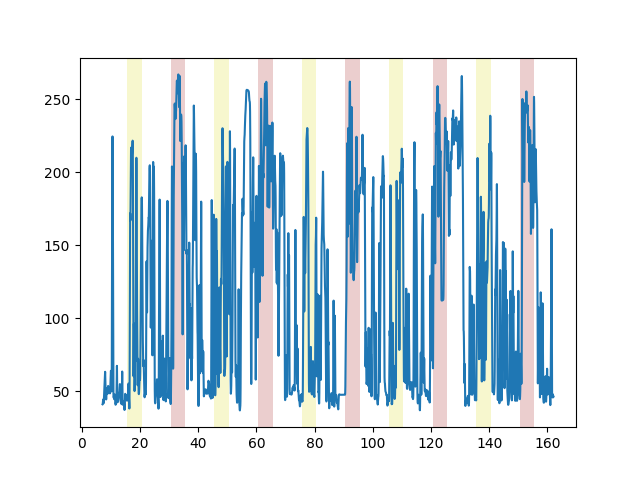

In [109]:
%matplotlib notebook
plt.plot(beh_df.t, gaussian_filter1d(median_filter(beh_df.hrtita_y_rel_neck, size=5), sigma=5))
# plt.plot(beh_df.t, gaussian_filter1d(median_filter(beh_df.frtita_y_rel_neck, size=5), sigma=5))

myplt.shade_categorical(x=beh_df.t.values, catvar=beh_df.laser_power_uW.values,
                        colors=[myplt.WHITE, myplt.DARKYELLOW, myplt.DARKRED])

In [7]:
headless_files = {
    "MDN": os.path.join(params.plotdata_base_dir, "headless_MDN3.pkl"),
    "DNp09": os.path.join(params.plotdata_base_dir, "headless_DNp09.pkl"),
    "aDN2": os.path.join(params.plotdata_base_dir, "headless_aDN2.pkl"),
    "PR": os.path.join(params.plotdata_base_dir, "headless_PR.pkl"),
}

In [47]:
with open(headless_files["MDN"], "rb") as f:
    MDN = pickle.load(f)
with open(headless_files["DNp09"], "rb") as f:
    DNp09 = pickle.load(f)
with open(headless_files["aDN2"], "rb") as f:
    aDN2 = pickle.load(f)
with open(headless_files["PR"], "rb") as f:
    PR = pickle.load(f)

In [32]:
MDN[0].keys()

dict_keys(['fly_df', 'fly_id', 'fly_dir', 'trial_names', 'beh_responses_pre', 'beh_responses_post', 'beh_class_responses_pre', 'beh_class_responses_post'])

In [35]:
MDN[0]["beh_responses_pre"].shape

(1500, 10)

In [44]:
i_0 = 500
i_1 = 750
v_pre = []
p_pre = []
v_post = []
p_post = []
for fly in MDN:
    v_pre.append(np.mean(fly["beh_responses_pre"][i_0:i_1], axis=0))
    v_post.append(np.mean(fly["beh_responses_post"][i_0:i_1], axis=0))
    p_pre.append(np.mean(fly["beh_class_responses_pre"][i_0:i_1] == 3, axis=0))
    p_post.append(np.mean(fly["beh_class_responses_post"][i_0:i_1] == 3, axis=0))
v_pre = np.array(v_pre).flatten()
v_post = np.array(v_post).flatten()
p_pre = np.array(p_pre).flatten()
p_post = np.array(p_post).flatten()

In [46]:
print(mannwhitneyu(v_pre, v_post))
print(mannwhitneyu(p_pre, p_post))

MannwhitneyuResult(statistic=1189.0, pvalue=0.3383113719876617)
MannwhitneyuResult(statistic=1069.0, pvalue=0.10666901191258321)


In [67]:
def test_stats_pre_post(all_flies, i_beh, GAL4, beh_name, i_0=500, i_1=750):
    v_pre = []
    p_pre = []
    v_post = []
    p_post = []
    for fly in all_flies:
        v_pre.append(np.mean(fly["beh_responses_pre"][i_0:i_1], axis=0))
        v_post.append(np.mean(fly["beh_responses_post"][i_0:i_1], axis=0))
        p_pre.append(np.mean(fly["beh_class_responses_pre"][i_0:i_1] == i_beh, axis=0))
        p_post.append(np.mean(fly["beh_class_responses_post"][i_0:i_1] == i_beh, axis=0))
    v_pre = np.concatenate(v_pre).flatten()
    v_post = np.concatenate(v_post).flatten()
    p_pre = np.concatenate(p_pre).flatten()
    p_post = np.concatenate(p_post).flatten()
    # print(v_post)
    print(f"{GAL4} v:", mannwhitneyu(v_pre, v_post))
    print(f"{GAL4} {beh_name} beh class:", mannwhitneyu(p_pre, p_post))

In [69]:
test_stats_pre_post(MDN, i_beh=3, GAL4="MDN", beh_name="back")
test_stats_pre_post(DNp09, i_beh=1, GAL4="DNp09", beh_name="walk")
test_stats_pre_post(aDN2, i_beh=4, GAL4="aDN2", beh_name="groom")
test_stats_pre_post(PR, i_beh=2, GAL4="PR", beh_name="rest")

MDN v: MannwhitneyuResult(statistic=1189.0, pvalue=0.3383113719876617)
MDN back beh class: MannwhitneyuResult(statistic=1069.0, pvalue=0.10666901191258321)
DNp09 v: MannwhitneyuResult(statistic=254.0, pvalue=3.376241416317229e-12)
DNp09 walk beh class: MannwhitneyuResult(statistic=217.0, pvalue=1.0627223951265876e-14)
aDN2 v: MannwhitneyuResult(statistic=658.0, pvalue=3.6748142850344165e-05)
aDN2 groom beh class: MannwhitneyuResult(statistic=513.0, pvalue=1.8761045308741835e-08)
PR v: MannwhitneyuResult(statistic=843.0, pvalue=0.0025366861993040986)
PR rest beh class: MannwhitneyuResult(statistic=555.5, pvalue=2.1293258558074182e-07)


In [72]:
detailled_files = {
"DNp09_anus": os.path.join(params.plotdata_base_dir, "headless_DNp09_anus.pkl"),
"PR_anus": os.path.join(params.plotdata_base_dir, "headless_PR_anus.pkl"),
"aDN2_height": os.path.join(params.plotdata_base_dir, "headless_aDN2_frleg_height.pkl"),
"PR_height": os.path.join(params.plotdata_base_dir, "headless_PR_frleg_height.pkl"),
"aDN2_angle": os.path.join(params.plotdata_base_dir, "headless_aDN2_tibia_angle.pkl"),
"PR_angle": os.path.join(params.plotdata_base_dir, "headless_PR_tibia_angle.pkl"),
    }

In [73]:
with open(detailled_files["DNp09_anus"], "rb") as f:
    DNp09_anus = pickle.load(f)
with open(detailled_files["PR_anus"], "rb") as f:
    PR_anus = pickle.load(f)
with open(detailled_files["aDN2_height"], "rb") as f:
    aDN2_height = pickle.load(f)
with open(detailled_files["PR_height"], "rb") as f:
    PR_height = pickle.load(f)
with open(detailled_files["aDN2_angle"], "rb") as f:
    aDN2_angle = pickle.load(f)
with open(detailled_files["PR_angle"], "rb") as f:
    PR_angle = pickle.load(f)

In [74]:
def test_stats_beh_control(all_flies, all_flies_control, GAL4, beh_name, i_0=500, i_1=750):
    beh = []
    beh_control = []
    for fly, fly_control in zip(all_flies, all_flies_control):
        beh.append(np.mean(fly["beh_responses_post"][i_0:i_1], axis=0))
        beh_control.append(np.mean(fly_control["beh_responses_post"][i_0:i_1], axis=0))
    beh = np.concatenate(beh).flatten()
    beh_control = np.concatenate(beh_control).flatten()
    print(f"{GAL4} {beh_name}:", mannwhitneyu(beh, beh_control))


In [76]:
test_stats_beh_control(DNp09_anus, PR_anus, GAL4="DNp09", beh_name="anus")
test_stats_beh_control(aDN2_height, PR_height, GAL4="aDN2", beh_name="height")
test_stats_beh_control(aDN2_angle, PR_angle, GAL4="aDN2", beh_name="angle")

DNp09 anus: MannwhitneyuResult(statistic=619.0, pvalue=6.914668744959401e-06)
aDN2 height: MannwhitneyuResult(statistic=1016.0, pvalue=0.07225558025213427)
aDN2 angle: MannwhitneyuResult(statistic=1040.0, pvalue=0.09831179059231548)


In [6]:
n_activated_file = os.path.join(params.plotdata_base_dir, "n_activated_stats_walk_to_stim.csv")
active_df = pd.read_csv(n_activated_file)

In [7]:
active_df

,fly_id,CsChrimson,n_neurons,n_active,frac_active,e_n_active,e_f_active
0,3,MDN3,50,16,0.320000,5.963122,0.119262
1,5,MDN3,51,14,0.274510,5.872015,0.115138
2,7,MDN3,67,22,0.328358,7.200369,0.107468
3,20,MDN3,55,17,0.309091,4.715554,0.085737
4,28,MDN3,48,15,0.312500,2.440787,0.050850
5,34,MDN3,83,20,0.240964,4.942677,0.059550
6,50,MDN3,59,26,0.440678,4.637908,0.078609
7,51,MDN3,57,25,0.438596,5.137069,0.090124
8,71,MDN3,58,31,0.534483,8.086621,0.139425
9,15,DNp09,66,43,0.651515,18.039435,0.273325


<AxesSubplot:xlabel='CsChrimson'>

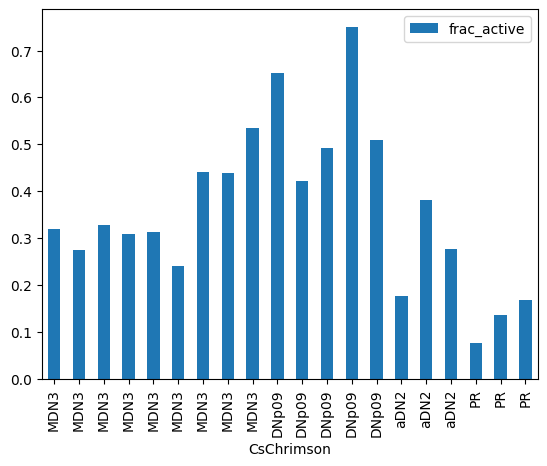

In [8]:
active_df.plot.bar(x="CsChrimson", y="frac_active")

In [9]:
active_df.groupby("CsChrimson").mean()

,fly_id,n_neurons,n_active,frac_active,e_n_active,e_f_active
CsChrimson,,,,,,
DNp09,36.800000,61.800000,35.600000,0.564637,12.561172,0.200027
MDN3,29.888889,58.666667,20.666667,0.355464,5.444014,0.094018
PR,27.666667,65.333333,8.000000,0.127336,1.517135,0.024116
aDN2,43.666667,63.333333,17.666667,0.278867,8.280332,0.127698


In [46]:
linewidth = 2
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelpad'] = 5

In [61]:
ax

<AxesSubplot:>

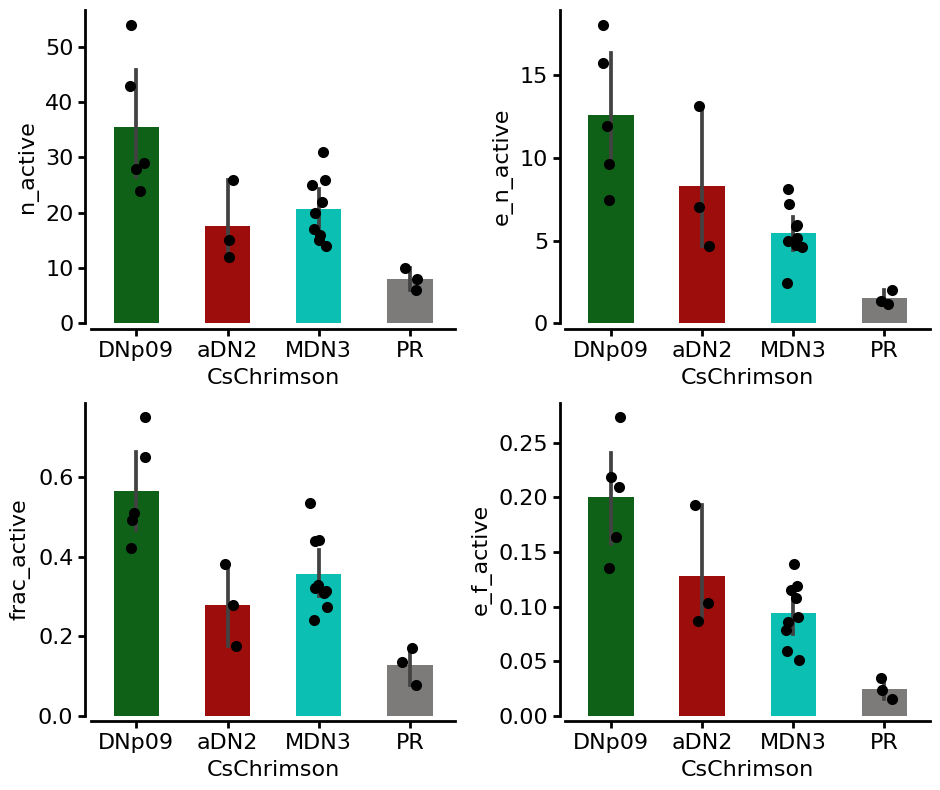

In [65]:
var = "e_f_active"  # "frac_active"

fig, axs = plt.subplots(2,2, figsize=(9.5,8))

for ax, var in zip(axs.flatten(), ["n_active", "e_n_active", "frac_active", "e_f_active"]):

    sns.barplot(ax=ax, data=active_df, x="CsChrimson", y=var, order=["DNp09", "aDN2", "MDN3", "PR"], hue="CsChrimson",
                palette=[myplt.DARKCYAN, myplt.DARKGREEN, myplt.DARKRED, myplt.DARKGRAY], saturation=1, dodge=False, width=0.5, alpha=1)
    sns.stripplot(ax=ax, data=active_df, x="CsChrimson", y=var, order=["DNp09", "aDN2", "MDN3", "PR"], color=myplt.BLACK, size=8)
    plotpanels.make_nice_spines(ax)
    ax.legend([], frameon=False)
fig.tight_layout()

In [68]:
print(mannwhitneyu(active_df["n_active"][active_df["CsChrimson"] == "DNp09"], active_df["n_active"][active_df["CsChrimson"] == "PR"]))
print(mannwhitneyu(active_df["n_active"][active_df["CsChrimson"] == "aDN2"], active_df["n_active"][active_df["CsChrimson"] == "PR"]))
print(mannwhitneyu(active_df["n_active"][active_df["CsChrimson"] == "MDN3"], active_df["n_active"][active_df["CsChrimson"] == "PR"]))

MannwhitneyuResult(statistic=0.0, pvalue=0.018444212853524936)
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=0.0, pvalue=0.008115024287306677)


In [69]:
print(mannwhitneyu(active_df["e_n_active"][active_df["CsChrimson"] == "DNp09"], active_df["e_n_active"][active_df["CsChrimson"] == "PR"]))
print(mannwhitneyu(active_df["e_n_active"][active_df["CsChrimson"] == "aDN2"], active_df["e_n_active"][active_df["CsChrimson"] == "PR"]))
print(mannwhitneyu(active_df["e_n_active"][active_df["CsChrimson"] == "MDN3"], active_df["e_n_active"][active_df["CsChrimson"] == "PR"]))

MannwhitneyuResult(statistic=0.0, pvalue=0.018444212853524936)
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=0.0, pvalue=0.008115024287306677)


In [3]:
fly_dir = "/mnt/nas2/JB/230503_DfdxGCaMP6s_DNp09xCsChrimson/Fly3"
trial_names = ["001_xz_cc_p10", "002_xz_olfac", "003_xz_cc_p10", "005_xz_cc_p10_postCO2"]

In [4]:
twop_df, beh_df = loaddata.load_data(fly_dir, all_trial_dirs=trial_names)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


# samples for fast and slow calculation: 5971 579


In [5]:
beh_df

t  \
Date   Genotype                     Fly TrialName             Trial Frame               
230503 DfdxGCaMP6s_DNp09xCsChrimson 3   001_xz_cc_p10         0     0        0.000100   
                                                                    1        0.010100   
                                                                    2        0.020100   
                                                                    3        0.030100   
                                                                    4        0.040100   
...                                                                               ...   
                                        005_xz_cc_p10_postCO2 4     61295  612.602800   
                                                                    61296  612.612800   
                                                                    61297  612.622800   
                                                                    61298  612.632767   
                                                                    61299  612.642767   

                                                                                  abs_t  \
Date   Genotype                     Fly TrialName             Trial Frame                 
230503 DfdxGCaMP6s_DNp09xCsChrimson 3   001_xz_cc_p10         0     0      1.683128e+09   
                                                                    1      1.683128e+09   
                                                                    2      1.683128e+09   
                                                                    3      1.683128e+09   
                                                                    4      1.683128e+09   
...                                                                                 ...   
                                        005_xz_cc_p10_postCO2 4     61295  1.683132e+09   
                                                                    61296  1.683132e+09   
                                                                    61297  1.683132e+09   
                                                                    61298  1.683132e+09   
                                                                    61299  1.683132e+09   

                                                                                    twop_index  \
Date   Genotype                     Fly TrialName             Trial Frame                        
230503 DfdxGCaMP6s_DNp09xCsChrimson 3   001_xz_cc_p10         0     0     -9223372036854775808   
                                                                    1     -9223372036854775808   
                                                                    2     -9223372036854775808   
                                                                    3     -9223372036854775808   
                                                                    4     -9223372036854775808   
...                                                                                        ...   
                                        005_xz_cc_p10_postCO2 4     61295                 9919   
                                                                    61296                 9920   
                                                                    61297                 9920   
                                                                    61298                 9920   
                                                                    61299                 9920   

                                                                              v_raw  \
Date   Genotype                     Fly TrialName             Trial Frame             
230503 DfdxGCaMP6s_DNp09xCsChrimson 3   001_xz_cc_p10         0     0      0.000000   
                                                                    1      6.554947   
                                                                    2      6.699847   
                                

In [6]:
beh_df.keys()

Index(['t', 'abs_t', 'twop_index', 'v_raw', 'th_raw', 'x', 'y',
       'integrated_forward_movement', 'integrated_side_movement',
       'delta_rot_lab_side', 'delta_rot_lab_forward', 'delta_rot_lab_turn',
       'v', 'th', 'v_forw', 'v_side', 'v_turn', 'laser_stim', 'laser_cond',
       'laser_power', 'laser_power_uW', 'laser_start', 'laser_stop',
       'me_front', 'me_back', 'me_all', 'me_mid', 'olfac_stim', 'olfac_cond',
       'olfac_start', 'olfac_stop', 'me_front_q', 'me_back_q', 'me_mid_q',
       'me_all_q', 'silent', 'fast', 'walk', 'rest', 'back', 'groom', 'frub',
       'post', 'beh_class', 'back_trig_start', 'back_trig_stop', 'back_trig',
       'walk_trig_start', 'walk_trig_stop', 'walk_trig', 'rest_trig_start',
       'rest_trig_stop', 'rest_trig', 'groom_trig_start', 'groom_trig_stop',
       'groom_trig'],
      dtype='object')

<IPython.core.display.Javascript object>


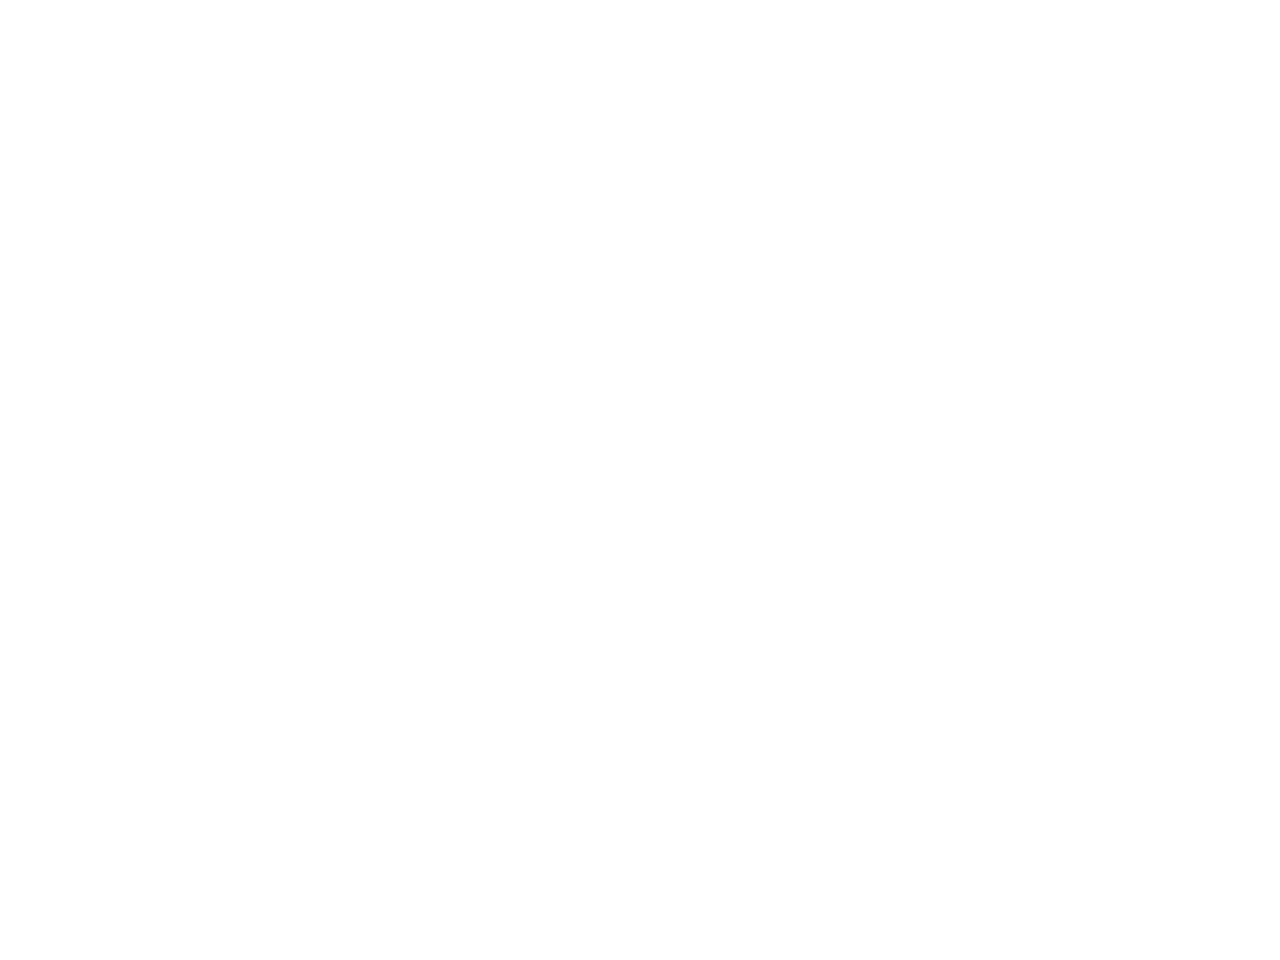

(array([1.7000e+01, 7.0000e+00, 3.4000e+01, 1.0100e+02, 9.9000e+01,
        2.3800e+02, 3.7100e+02, 7.4300e+02, 1.0040e+03, 1.5760e+03,
        2.2150e+03, 3.2560e+03, 4.3760e+03, 4.9460e+03, 6.1850e+03,
        7.4650e+03, 8.5400e+03, 9.2860e+03, 1.0358e+04, 1.1656e+04,
        1.2121e+04, 1.2255e+04, 1.2437e+04, 1.2501e+04, 1.2948e+04,
        1.2374e+04, 1.2355e+04, 1.1590e+04, 1.0660e+04, 9.4630e+03,
        8.7700e+03, 8.3380e+03, 7.3360e+03, 5.5910e+03, 4.7920e+03,
        4.2820e+03, 3.4980e+03, 2.5940e+03, 2.3890e+03, 1.8080e+03,
        1.3950e+03, 9.5500e+02, 6.5200e+02, 5.3800e+02, 5.1300e+02,
        3.0900e+02, 1.4200e+02, 6.8000e+01, 3.2000e+01, 2.1000e+01]),
 array([-0.38642446, -0.35100259, -0.31558071, -0.28015884, -0.24473696,
        -0.20931509, -0.17389321, -0.13847134, -0.10304946, -0.06762759,
        -0.03220571,  0.00321616,  0.03863804,  0.07405991,  0.10948179,
         0.14490366,  0.18032554,  0.21574741,  0.25116929,  0.28659116,
         0.32201304,  0.35

In [7]:
%matplotlib notebook
plt.hist(beh_df.me_all_q, bins=50)

<IPython.core.display.Javascript object>


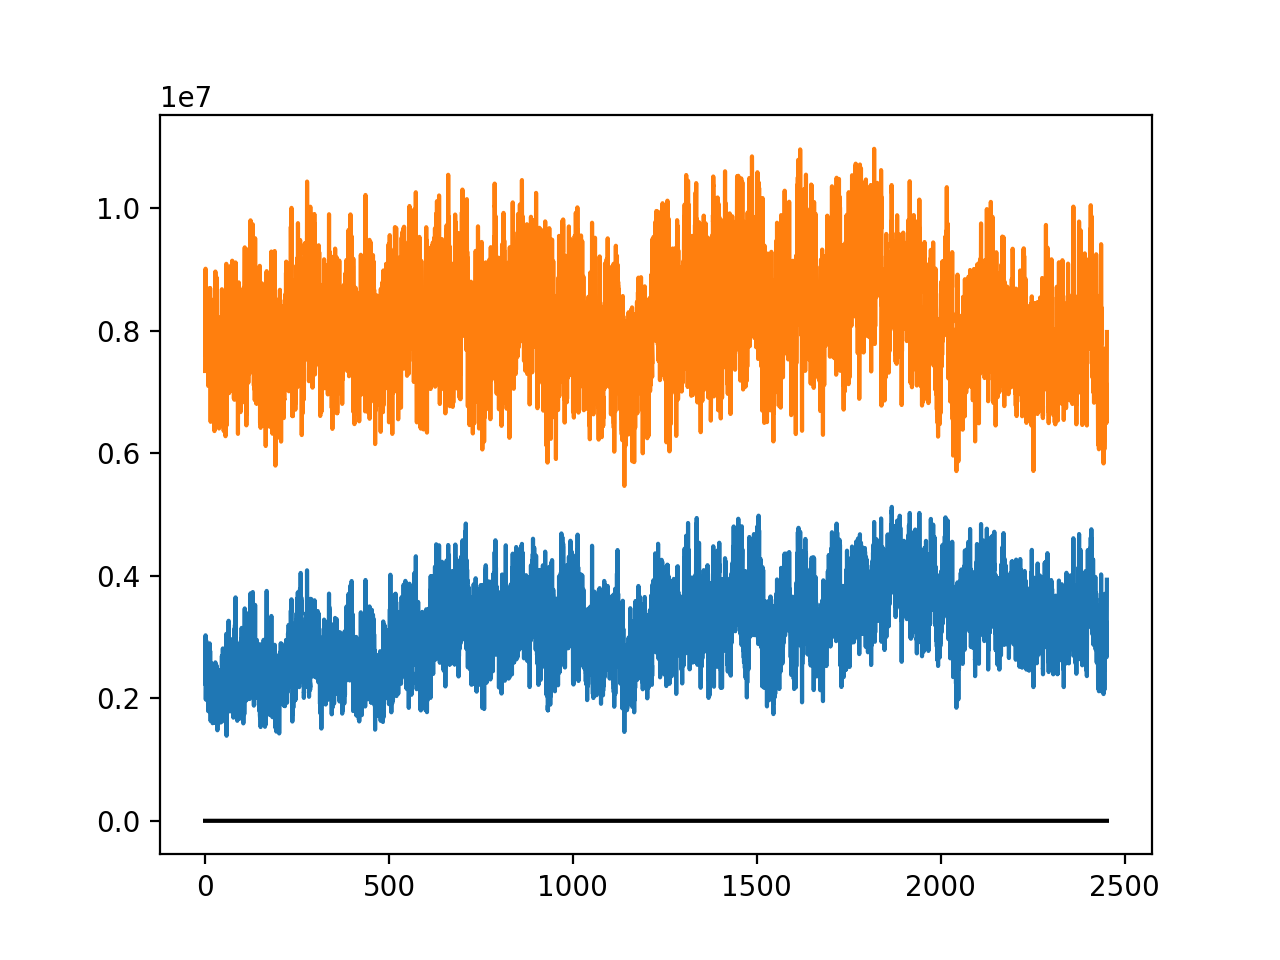

In [11]:
%matplotlib notebook
plt.plot(np.arange(len(beh_df))/100, beh_df.laser_stim.values, "k")
plt.plot(np.arange(len(beh_df))/100, beh_df.me_front.values) 
plt.plot(np.arange(len(beh_df))/100, beh_df.me_all.values)


In [ ]:
# np.correlate(beh_df.v, beh_df.me_all_q)

In [12]:
import cv2

In [13]:
import motionenergy

In [30]:
mean_frame_all = cv2.imread(os.path.join(fly_dir, trial_names[-1], "behData", "images", "camera_5_mean.jpg"))[:,:,0]
# mean_frame = cv2.imread("/mnt/nas2/JB/230503_DfdxGCaMP6s_aDN2xCsChrimson/Fly2/004_xz_cc_p20_postCO2/behData/images/camera_5_mean.jpg")[:,:,0]

In [22]:
def get_frames_mean(video_file, n_frames=25*100):
    frames = []
    f = cv2.VideoCapture(video_file)
    rval, frame = f.read()
    # Convert rgb to grey scale
    mean_frame = np.zeros_like(frame[:, :, 0], dtype=np.int64)
    count = 0
    while rval and count < n_frames:
        mean_frame =  mean_frame + frame[:, :, 0]
        frames.append(frame[:, :, 0])
        rval, frame = f.read()
        count += 1
    f.release()
    mean_frame = mean_frame / count
    mean_frame = mean_frame.astype(np.uint8)
    return frames, mean_frame

In [28]:
video_file = os.path.join(fly_dir, trial_names[-1], "behData", "images", "camera_5.mp4")


In [29]:
frames, mean_frame = get_frames_mean(video_file)

In [31]:
len(frames)

2500

<IPython.core.display.Javascript object>


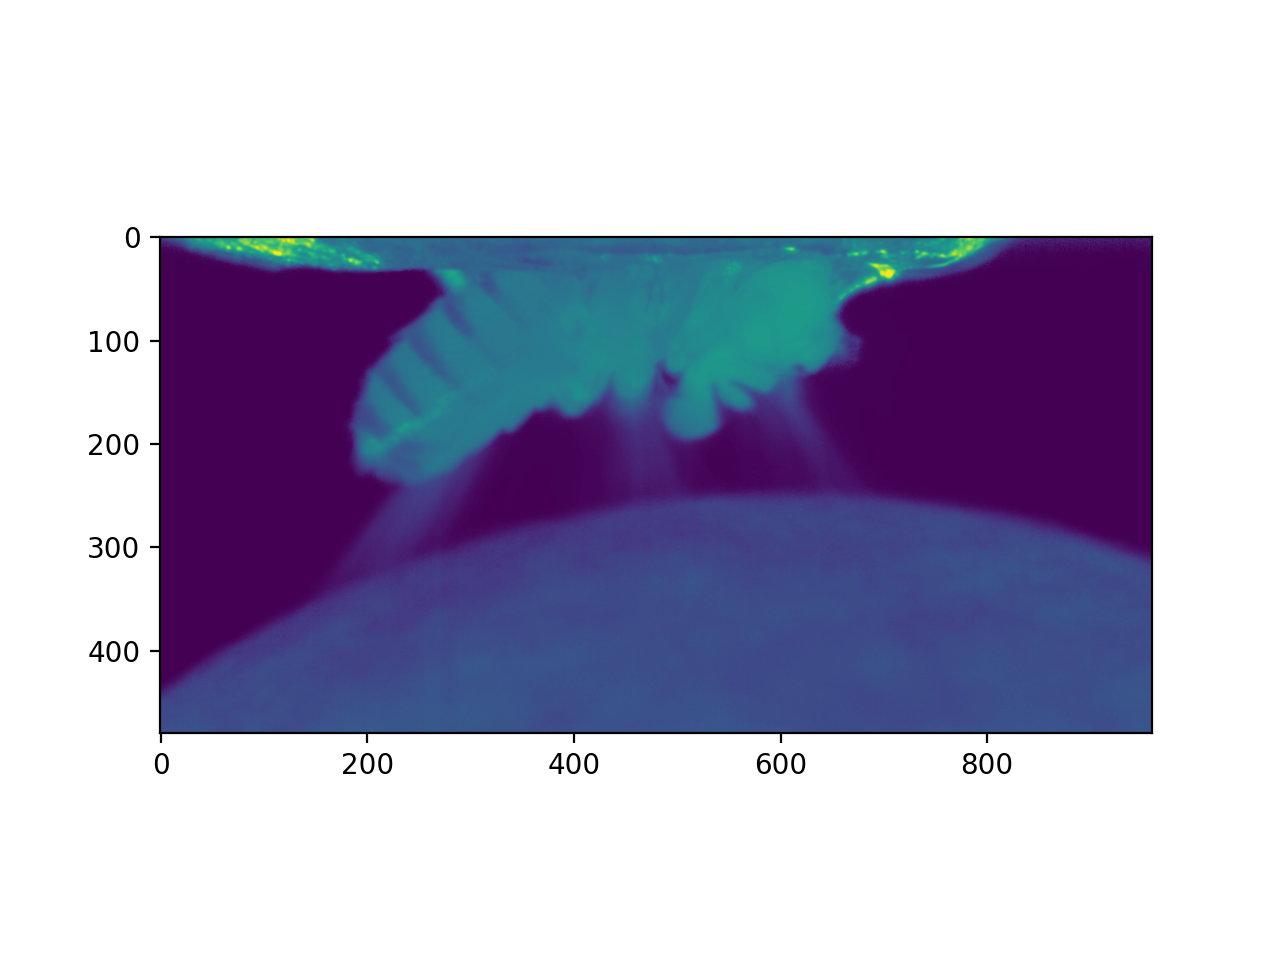

In [33]:
%matplotlib notebook
plt.imshow(mean_frame_all)

<IPython.core.display.Javascript object>


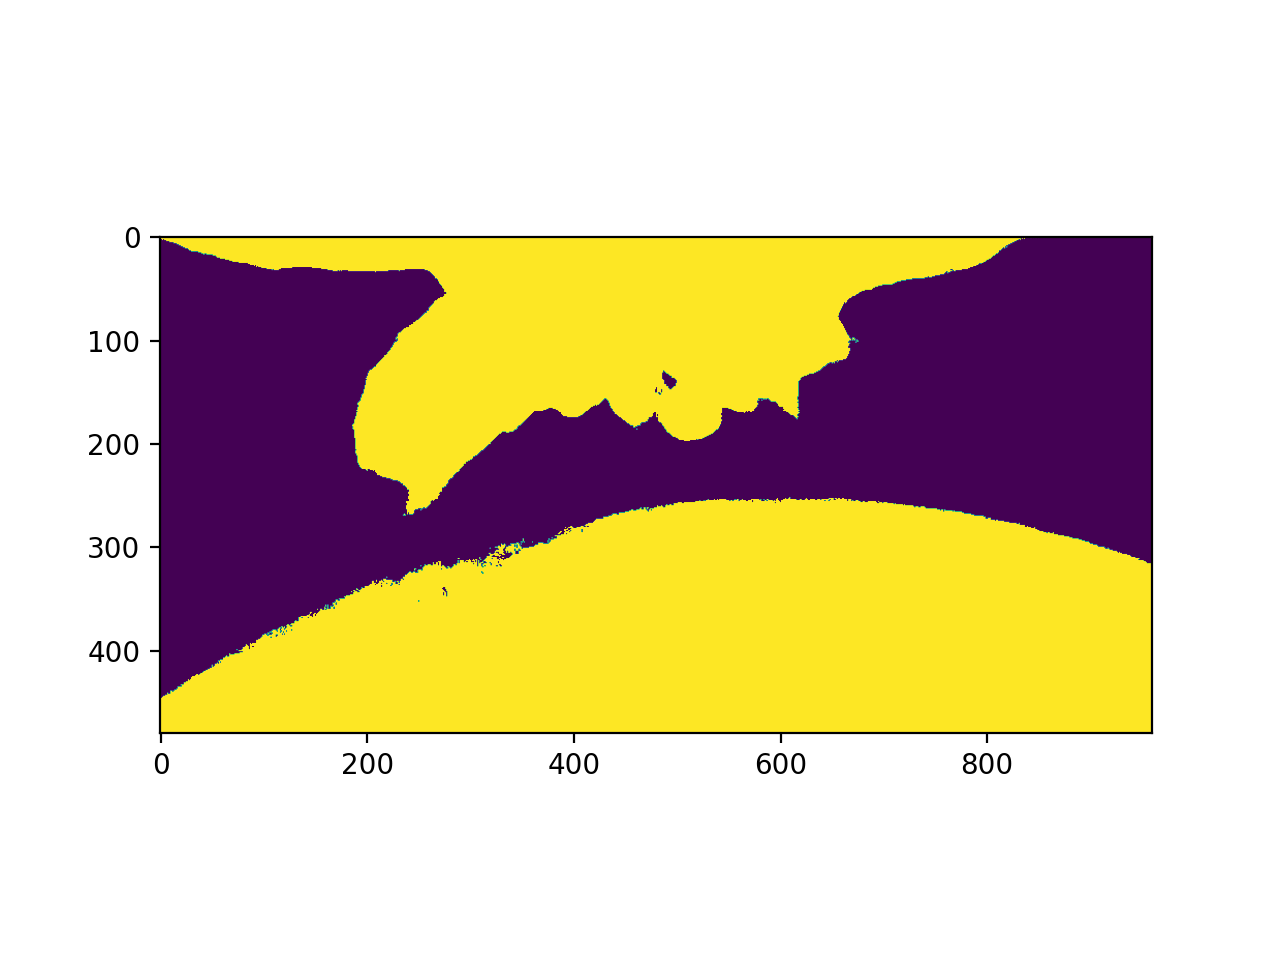

In [34]:
%matplotlib notebook
mask = motionenergy.get_mask(mean_frame_all)
plt.imshow(mask)

In [35]:
not_thres_image = np.logical_not(mask)
ball_mask, top_of_ball = motionenergy.get_ball_mask(mean_frame_all, return_top=True)
top_of_ball

240

<IPython.core.display.Javascript object>


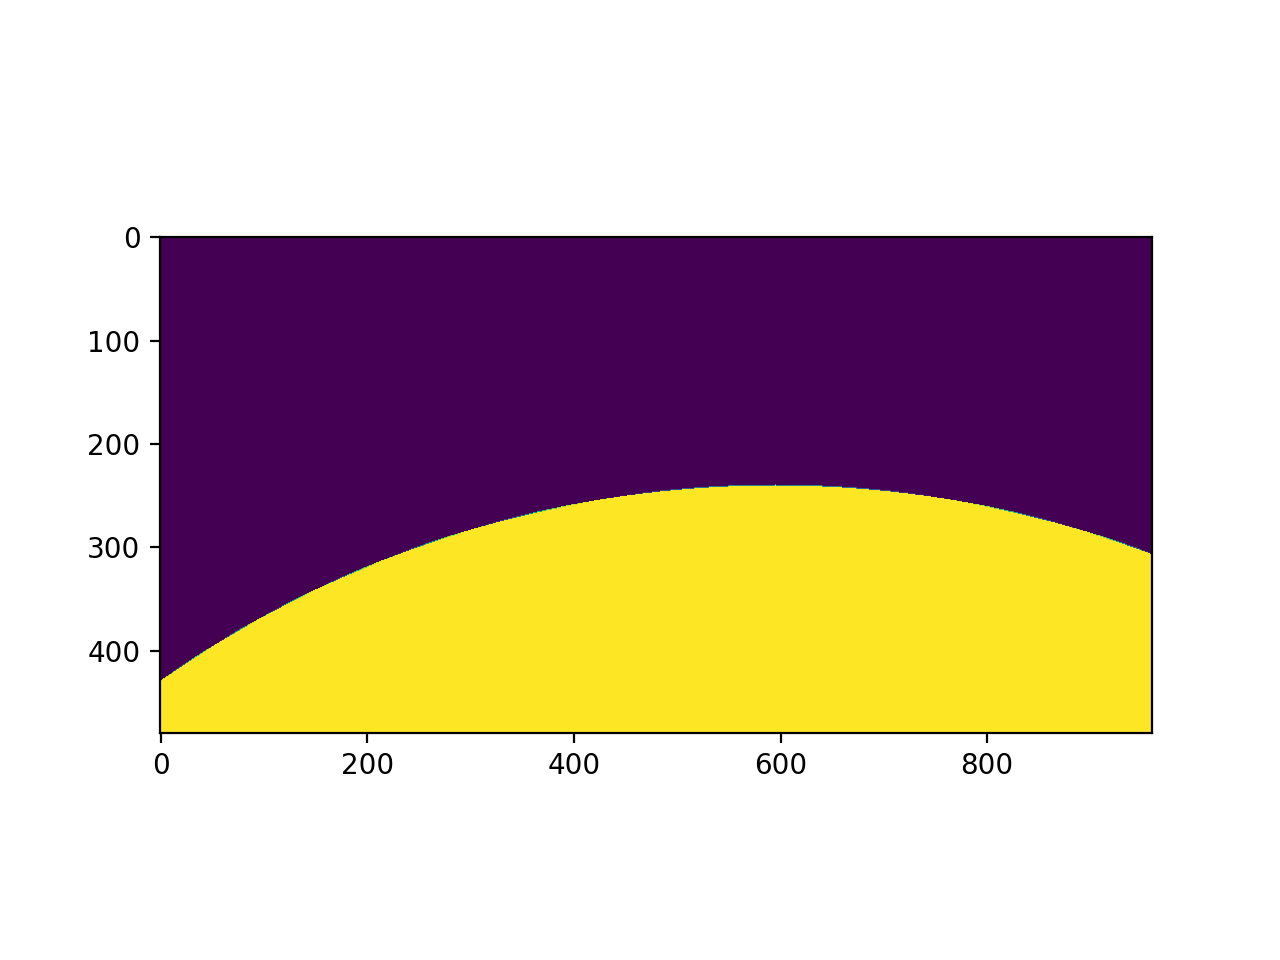

In [36]:
%matplotlib notebook
plt.imshow(ball_mask)

In [37]:
thres_image_front = motionenergy.get_front_mask(mean_frame, top_of_ball=top_of_ball, ball_mask=ball_mask)
thres_image_back = motionenergy.get_back_mask(mean_frame, top_of_ball=top_of_ball, ball_mask=ball_mask)
thres_image_mid = motionenergy.get_mid_mask(mean_frame, top_of_ball=top_of_ball, ball_mask=ball_mask)

<IPython.core.display.Javascript object>


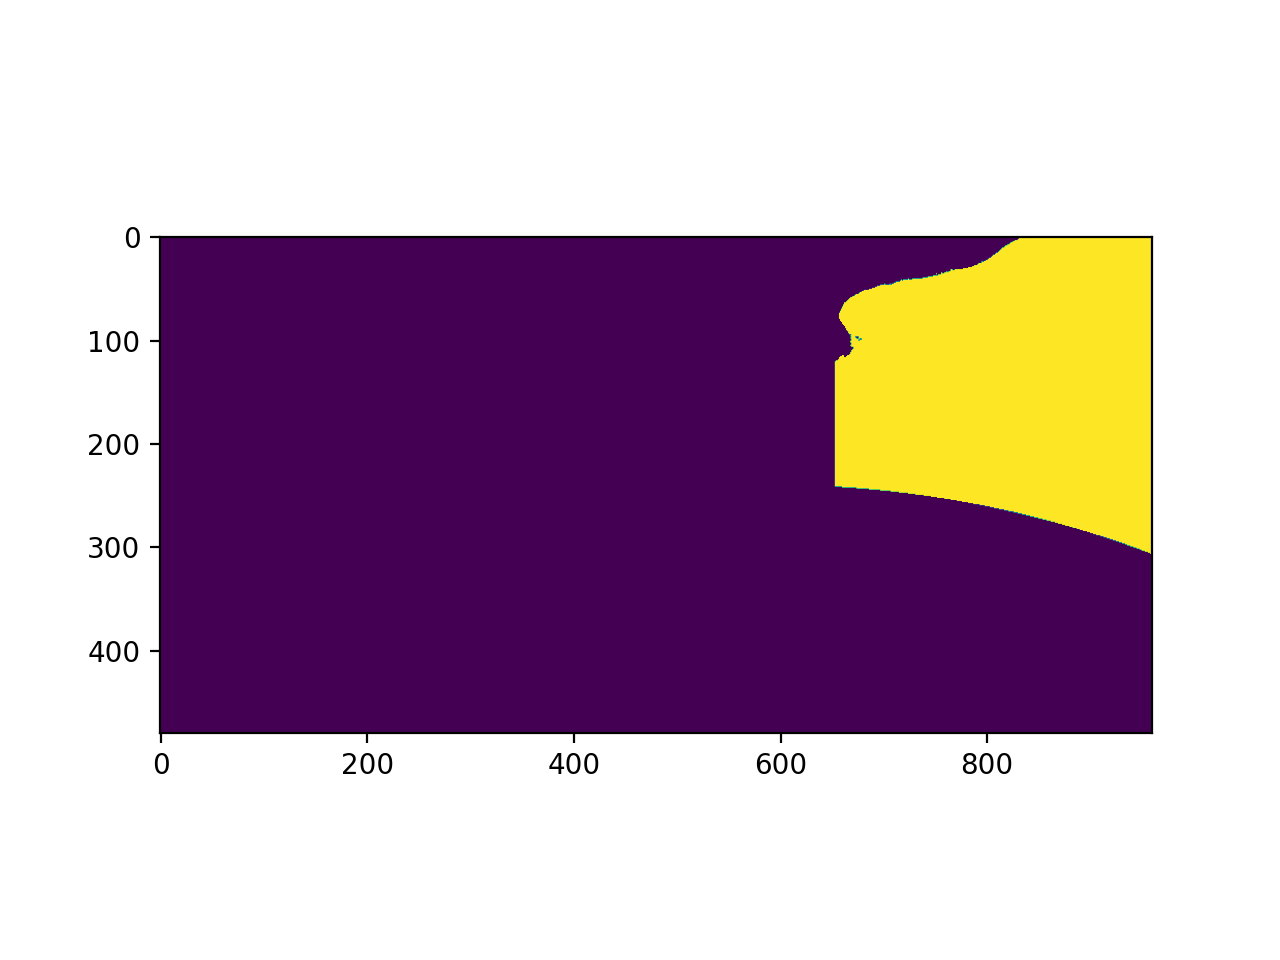

In [38]:
%matplotlib notebook
plt.imshow(thres_image_front)

In [39]:
meo_filt, mef_filt, meb_filt, mem_filt = motionenergy.compute_me(frames, mean_frame_all, )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2499/2499 [00:03<00:00, 809.55it/s]


<IPython.core.display.Javascript object>


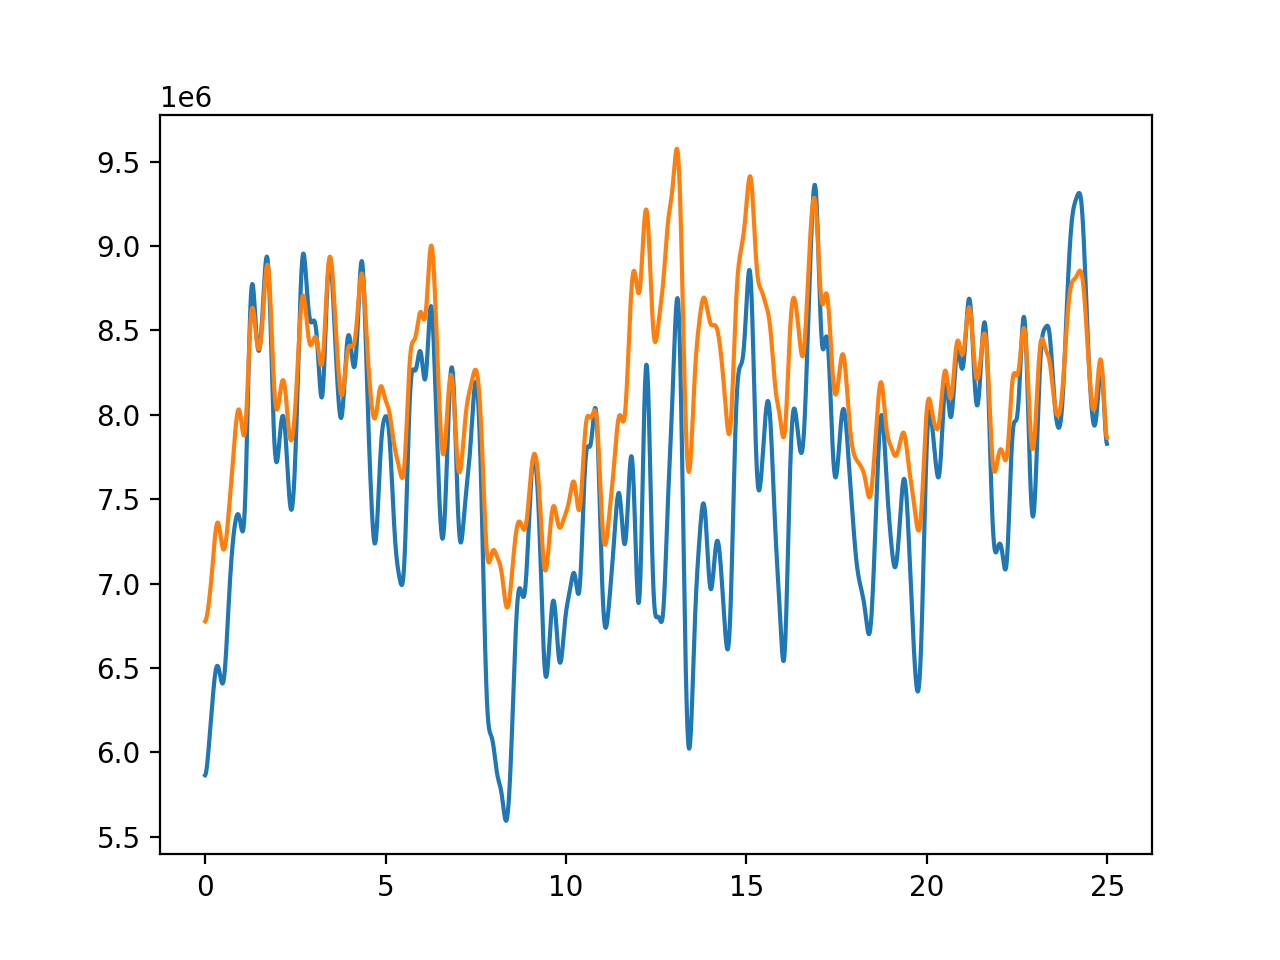

In [49]:
%matplotlib notebook
plt.plot(np.arange(2500)/100,mef_filt*2)
plt.plot(np.arange(2500)/100,meo_filt)

In [50]:
frames[0][thres_image_front]

array([43, 40, 41, ...,  5,  6,  1], dtype=uint8)

In [52]:
frames_front = np.array([frame[thres_image_front] for frame in frames])

In [54]:
frames_front.shape

(2500, 74486)

In [56]:
from tqdm import tqdm

In [61]:
motion_energy_front = np.zeros((len(frames)))
motion_energy_front_10 = np.zeros((len(frames)))
motion_energy_front_50 = np.zeros((len(frames)))

for i_frame in tqdm(range(len(frames)-50)):
    motion_energy_front[i_frame] = np.sum(frames[i_frame+1][thres_image_front]**2 - frames[i_frame][thres_image_front]**2)
    motion_energy_front_10[i_frame] = np.sum(frames[i_frame+10][thres_image_front]**2 - frames[i_frame][thres_image_front]**2)
    motion_energy_front_50[i_frame] = np.sum(frames[i_frame+50][thres_image_front]**2 - frames[i_frame][thres_image_front]**2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2450/2450 [00:02<00:00, 1221.75it/s]


In [63]:
from scipy.ndimage import gaussian_filter1d, gaussian_filter, median_filter


<IPython.core.display.Javascript object>


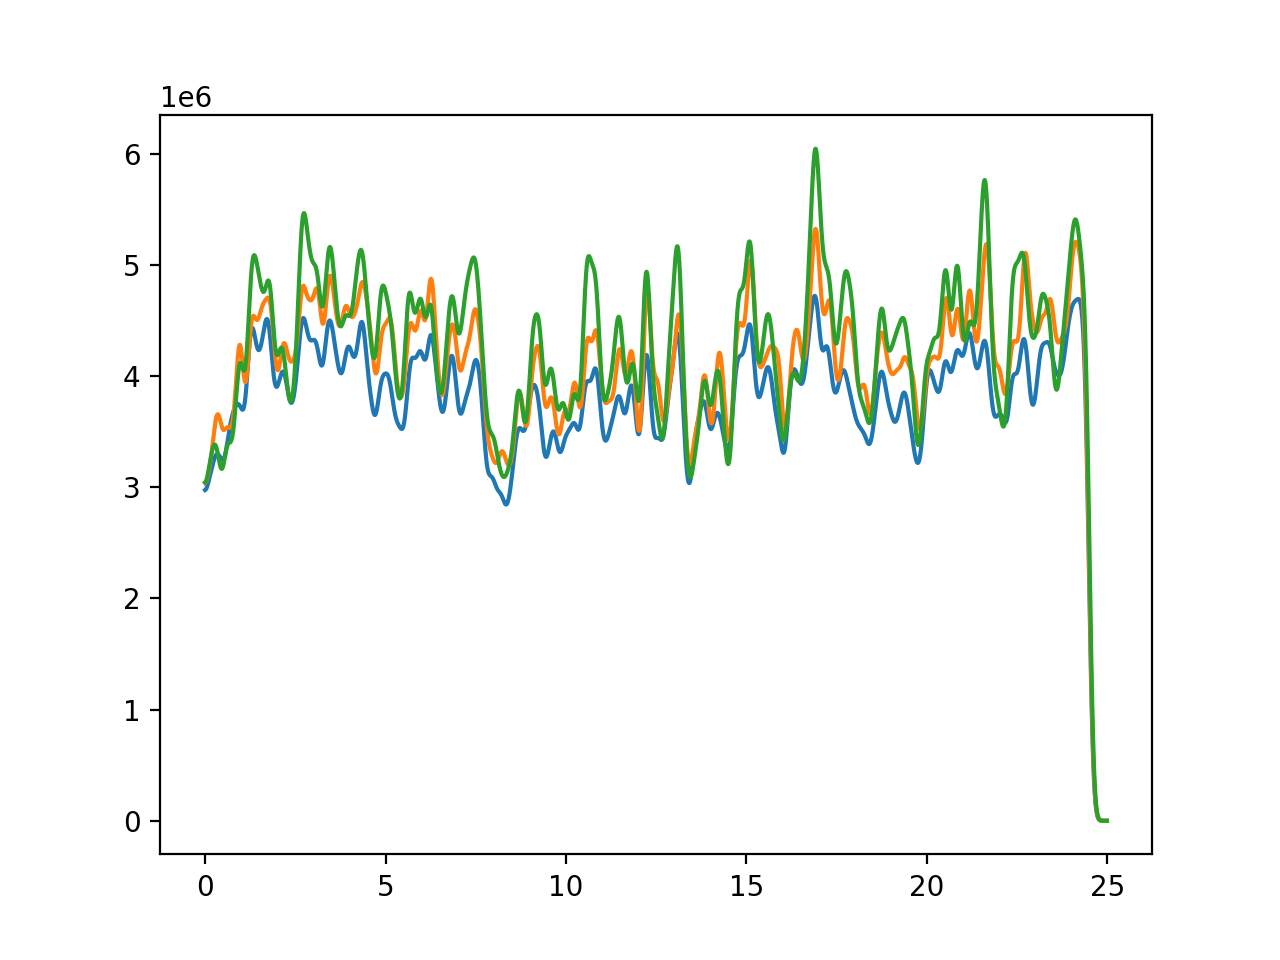

In [66]:
%matplotlib notebook
plt.plot(np.arange(2500)/100,gaussian_filter1d(median_filter(motion_energy_front, size=5), sigma=10))
plt.plot(np.arange(2500)/100,gaussian_filter1d(median_filter(motion_energy_front_10, size=5), sigma=10))
plt.plot(np.arange(2500)/100,gaussian_filter1d(median_filter(motion_energy_front_50, size=5), sigma=10))